# Analysis of Low-Carb Recipes

## Background
[Diet Doctor](https://www.dietdoctor.com/) is a popular website for people following a low-carb or keto diet, with over 1,000 recipes and other helpful resources. The aim of this project was to scrape information from recipes posted on the Diet Doctor website and perform some basic data analysis to answer the following questions:  

 * What are the most popular ingredients used in low carb/keto recipes?
 * Who are the most popular recipe authors on the Diet Doctor website? Which authors have the highest ratings? 
    
## Contents
 * [Data Collection](#Data-Collection)
     * [Test Scrape](#Test-Scrape)
     * [Full Scrape](#Full-Scrape)
 * [Data Cleaning: Recipes Data](#Data-Cleaning:-Recipes-Data)
 * [Exploratory Data Analysis: Recipes Data](#EDA:-Recipes-Data)
 * [Data Cleaning: Ingredients Data](#Data-Cleaning:-Ingredients-Data)
 * [Exploratory Data Analysis: Ingredients Data](#EDA:-Ingredients-Data)
 * [Summary of Observations](#Summary-of-Observations)

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import re
from bs4 import BeautifulSoup

## Data Collection

In [2]:
response = requests.get("https://www.dietdoctor.com/low-carb/recipes/new")
content = response.content
content[:1000]

b'<!DOCTYPE html>\n<html lang="en" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#" class="no-js"  data-country="us" data-language="en">\n<head>\n<meta charset="UTF-8" />\n\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n<meta name="viewport" content="initial-scale=1.0" />\n<meta name="description" content="We&#039;re adding new healthy and delicious low-carb and keto recipes every week, so check back often for updates. The latest additions are at the top. Enjoy!" />\n<meta itemprop="datePublished" content="2016-06-13T11:47:00+02:00" />\n<meta itemprop="dateModified" content="2021-01-29T14:15:33+01:00" />\n<link rel="pingback" href="https://www.dietdoctor.com/xmlrpc.php" />\n<meta name=\'robots\' content=\'max-image-preview:large\' />\n\n<script data-cfasync="false" data-pagespeed-no-defer type="text/javascript">//<![CDATA[\n\t\t\tvar dataLayer = dataLayer || [];\n\t\t//]]>\n</script>\n<!-- Start Google Tag Manager  -->\n\t\t<script data-cfasync="false" d

In [3]:
content = content.decode("utf-8")
content[:1000]

'<!DOCTYPE html>\n<html lang="en" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#" class="no-js"  data-country="us" data-language="en">\n<head>\n<meta charset="UTF-8" />\n\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n<meta name="viewport" content="initial-scale=1.0" />\n<meta name="description" content="We&#039;re adding new healthy and delicious low-carb and keto recipes every week, so check back often for updates. The latest additions are at the top. Enjoy!" />\n<meta itemprop="datePublished" content="2016-06-13T11:47:00+02:00" />\n<meta itemprop="dateModified" content="2021-01-29T14:15:33+01:00" />\n<link rel="pingback" href="https://www.dietdoctor.com/xmlrpc.php" />\n<meta name=\'robots\' content=\'max-image-preview:large\' />\n\n<script data-cfasync="false" data-pagespeed-no-defer type="text/javascript">//<![CDATA[\n\t\t\tvar dataLayer = dataLayer || [];\n\t\t//]]>\n</script>\n<!-- Start Google Tag Manager  -->\n\t\t<script data-cfasync="false" da

In [4]:
parser = BeautifulSoup(content, 'html.parser')

A screenshot of the "all-recipe" page is shown below. Each recipe links out to its own URL.

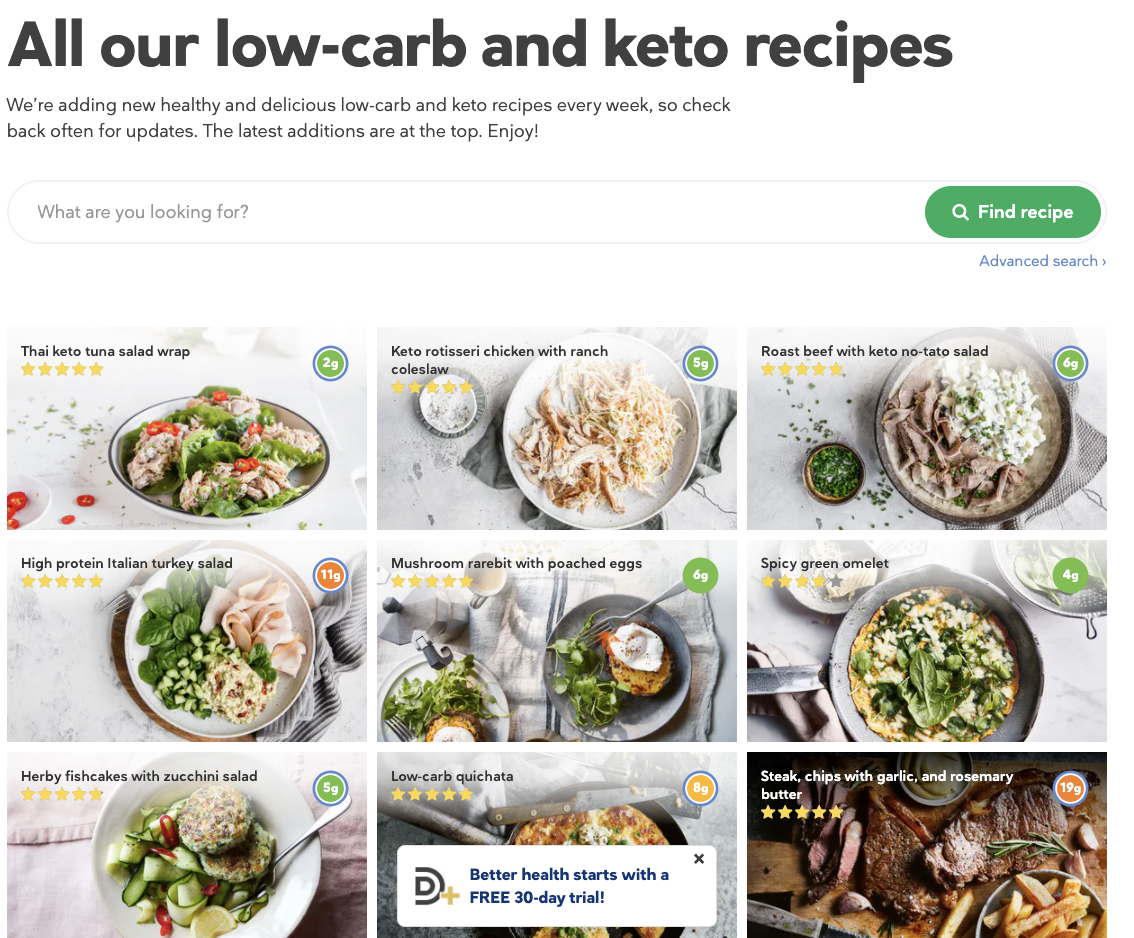

Let's create a list of all the individual recipe URLs, as we will want to pull information from each of them.

In [6]:
# find all the anchor tags with "href" attribute starting with "https://"
# and store the links in a list
links = []
for link in parser.find_all('a', attrs={'href': re.compile("^https://")}):
    # display the actual urls
    # print(link.get('href'))
    links.append(link.get('href'))

In [7]:
# check how many URLs we gathered
len(links)

1166

In [8]:
# view the first 20 URLs
links[:20]

['https://careers.dietdoctor.com/',
 'https://www.dietdoctor.com/low-carb/meal-plans',
 'https://www.dietdoctor.com/low-carb/recipes/meals',
 'https://www.dietdoctor.com/low-carb/recipes/breakfasts',
 'https://www.dietdoctor.com/low-carb/recipes/bread',
 'https://www.dietdoctor.com/low-carb/recipes/desserts',
 'https://www.dietdoctor.com/low-carb/recipes/snacks',
 'https://www.dietdoctor.com/low-carb/keto/recipes/sauces-dressings',
 'https://www.dietdoctor.com/low-carb/recipes/side-dishes',
 'https://www.dietdoctor.com/low-carb/recipes/drinks',
 'https://www.dietdoctor.com/low-carb/recipes/sitemap',
 'https://www.dietdoctor.com/low-carb/keto/recipes',
 'https://www.dietdoctor.com/recipes/thai-tuna-salad-wrap',
 'https://www.dietdoctor.com/recipes/keto-rotisseri-chicken-with-ranch-coleslaw',
 'https://www.dietdoctor.com/recipes/roast-beef-with-keto-no-tato-salad',
 'https://www.dietdoctor.com/recipes/high-protein-italian-turkey-salad',
 'https://www.dietdoctor.com/recipes/mushroom-rareb

In [9]:
# view the last 20 URLs
links[-20:]

['https://www.dietdoctor.com/about',
 'https://www.dietdoctor.com/about/contact',
 'https://www.dietdoctor.com/about/careers',
 'https://www.dietdoctor.com/about/team-diet-doctor',
 'https://www.dietdoctor.com/about/careers',
 'https://www.healthonnet.org/HONcode/Conduct.html?HONConduct739458',
 'https://www.facebook.com/thedietdoctor',
 'https://www.instagram.com/diet_doctor',
 'https://twitter.com/DietDoctor',
 'https://www.pinterest.com/thedietdoctor',
 'https://www.youtube.com/c/DietDoctorVideo',
 'https://www.dietdoctor.com/terms#copyright',
 'https://www.dietdoctor.com/terms#privacypolicy',
 'https://www.dietdoctor.com/terms#disclaimer',
 'https://www.dietdoctor.com/terms#comments',
 'https://www.dietdoctor.com',
 'https://www.dietdoctor.com/es/',
 'https://www.dietdoctor.com/se/',
 'https://www.dietdoctor.com/terms#disclaimer',
 'https://www.dietdoctor.com/terms#cookies']

Looks like the links list contains URLs for more than just the individual recipe sites. The recipe links start with 'https://www.dietdoctor.com/recipes/', so let's modify the list to include only those URLS.

In [10]:
recipe_links = []
for link in links:
    if link.startswith('https://www.dietdoctor.com/recipes/'):
        recipe_links.append(link)
len(recipe_links)

1131

In [11]:
recipe_links[:10]

['https://www.dietdoctor.com/recipes/thai-tuna-salad-wrap',
 'https://www.dietdoctor.com/recipes/keto-rotisseri-chicken-with-ranch-coleslaw',
 'https://www.dietdoctor.com/recipes/roast-beef-with-keto-no-tato-salad',
 'https://www.dietdoctor.com/recipes/high-protein-italian-turkey-salad',
 'https://www.dietdoctor.com/recipes/mushroom-rarebit-with-poached-eggs',
 'https://www.dietdoctor.com/recipes/spicy-green-omelete',
 'https://www.dietdoctor.com/recipes/herby-fishcakes-with-zucchini-salad',
 'https://www.dietdoctor.com/recipes/low-carb-quichata',
 'https://www.dietdoctor.com/recipes/steak-chips-with-garlic-and-rosemary-butter',
 'https://www.dietdoctor.com/recipes/stuffed-keto-mushrooms']

In [12]:
recipe_links[-10:]

['https://www.dietdoctor.com/recipes/keto-dairy-free-latte',
 'https://www.dietdoctor.com/recipes/low-carb-eggplant-gratin',
 'https://www.dietdoctor.com/recipes/low-carb-indian-lamb-stew',
 'https://www.dietdoctor.com/recipes/fish-with-vegetables-baked-in-foil',
 'https://www.dietdoctor.com/recipes/yellow-beet-salad-with-anchovies',
 'https://www.dietdoctor.com/recipes/mayonnaise',
 'https://www.dietdoctor.com/recipes/keto-pancakes-berries-whipped-cream',
 'https://www.dietdoctor.com/recipes/keto-curry-chicken-coconut-lime',
 'https://www.dietdoctor.com/recipes/keto-spinach-goat-cheese-pie',
 'https://www.dietdoctor.com/recipes/halloumiburger-with-rutabaga-fries']

We've successfully cut out the non-recipe URLs from our list, and are left with 1131 recipe links.

### Test Scrape

Let's explore one individual recipe site to get a sense of the data we'd like to gather. From the images below, it appears that each recipe site contains the following information:
 * Recipe name
 * Rating
 * Number of ratings
 * Recipe description
 * Ingredient list (where ingredient amounts are based on a customizable number of servings) 
 * Nutrition facts, including grams carbs, protein, and fat
 * Instructions
 * Recipe authors
 
In the following sections, we'll figure out how to pull the relevant data for our analysis using one recipe (Dalgona Coffee, shown below). Then, we'll create a function to execute the data collection for all 1131 recipes.

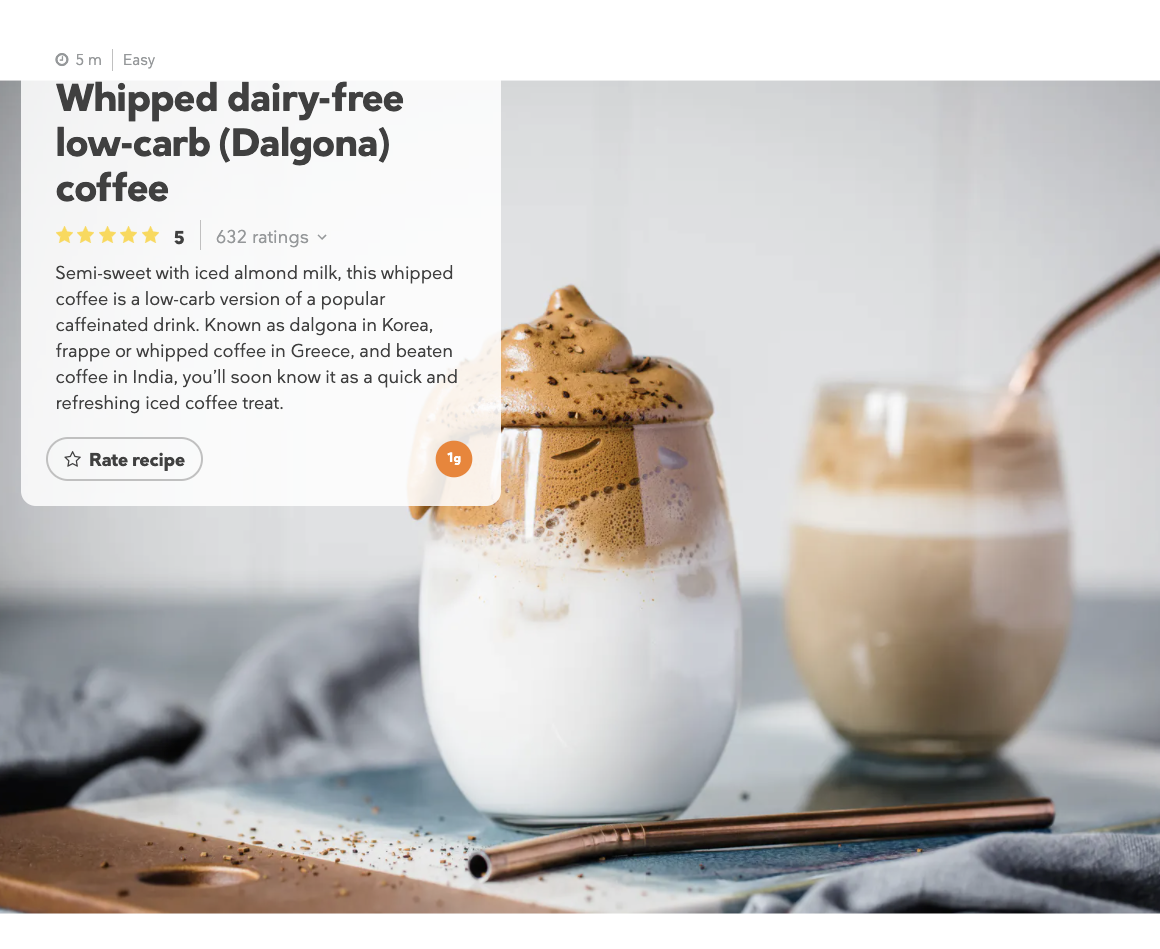
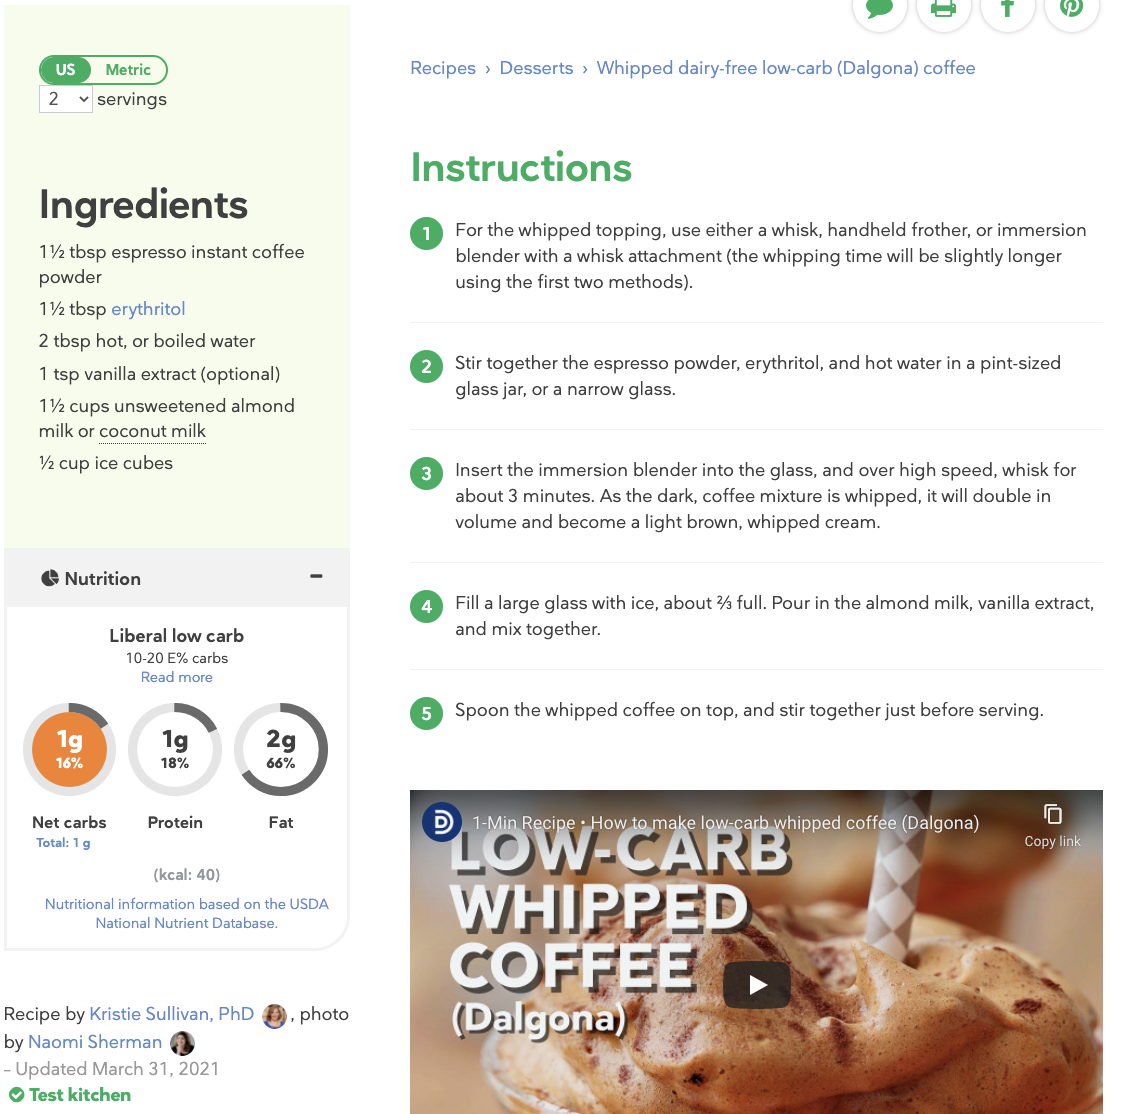

In [5]:
dalgona_coffee = requests.get('https://www.dietdoctor.com/recipes/whipped-dairy-free-low-carb-dalgona-coffee').content.decode('utf-8')

In [6]:
dalgona_coffee[:1000]

'<!DOCTYPE html>\n<html lang="en" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#" class="no-js"  data-country="us" data-language="en">\n<head>\n<meta charset="UTF-8" />\n\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n<meta name="viewport" content="initial-scale=1.0" />\n<meta name="description" content="Semi-sweet with iced almond milk, this whipped coffee is a low-carb version of a popular caffeinated drink. Known as dalgona in Korea, frappe or whipped coffee in Greece, and beaten coffee in India, you’ll soon know it as a quick and refreshing iced coffee treat." />\n<meta itemprop="datePublished" content="2020-04-09T09:07:27+02:00" />\n<meta itemprop="dateModified" content="2021-03-31T12:36:03+02:00" />\n<link rel="pingback" href="https://www.dietdoctor.com/xmlrpc.php" />\n<meta name=\'robots\' content=\'max-image-preview:large\' />\n\n<script data-cfasync="false" data-pagespeed-no-defer type="text/javascript">//<![CDATA[\n\t\t\tvar dataLayer = dataLa

In [7]:
coffee_parser = BeautifulSoup(dalgona_coffee, 'html.parser')

In [9]:
coffee_parser.find_all("head")[0]

<head>
<meta charset="utf-8"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="initial-scale=1.0" name="viewport"/>
<meta content="Semi-sweet with iced almond milk, this whipped coffee is a low-carb version of a popular caffeinated drink. Known as dalgona in Korea, frappe or whipped coffee in Greece, and beaten coffee in India, you’ll soon know it as a quick and refreshing iced coffee treat." name="description"/>
<meta content="2020-04-09T09:07:27+02:00" itemprop="datePublished"/>
<meta content="2021-03-31T12:36:03+02:00" itemprop="dateModified"/>
<link href="https://www.dietdoctor.com/xmlrpc.php" rel="pingback"/>
<meta content="max-image-preview:large" name="robots"/>
<script data-cfasync="false" data-pagespeed-no-defer="" type="text/javascript">//<![CDATA[
			var dataLayer = dataLayer || [];
		//]]>
</script>
<!-- Start Google Tag Manager  -->
<script data-cfasync="false" data-pagespeed-no-defer="" type="text/javascript">//<![CDATA[
//]]>
</script>

#### Recipe Name

In [10]:
coffee_parser.find("title").text

'Whipped Dairy-Free Low-Carb Coffee (Dalgona) - Recipe (Video)'

#### Description

In [11]:
coffee_parser.find('meta', attrs={'name': 'description'}).get('content')

'Semi-sweet with iced almond milk, this whipped coffee is a low-carb version of a popular caffeinated drink. Known as dalgona in Korea, frappe or whipped coffee in Greece, and beaten coffee in India, you’ll soon know it as a quick and refreshing iced coffee treat.'

#### Rating

In [20]:
dalgona_coffee.find("rating")

4598

In [21]:
dalgona_coffee[4500:4800]

'<link rel=\'dns-prefetch\' href=\'//s.dietdoctor.com\' />\n<link rel=\'dns-prefetch\' href=\'//dietdoctor-ratings-js.netlify.app\' />\n<!-- Start Optimizely script --><link rel="preload" href="https://cdn-pci.optimizely.com/js/18211312077.js" as="script"><script type="text/javascript" src="https://cdn-pci.opt'

In [24]:
dalgona_coffee.find("averageRating")

8127

In [25]:
dalgona_coffee[8100:8500]

'&fit=crop","itemRatings":{"averageRating":4.99,"numberOfRatings":756,"distribution":{"1":0,"2":0,"3":0.0013,"4":0.0066,"5":0.9921}},"nonce":"494a15967e","translations":{"ratings":"Ratings","rateRecipe":"Rate recipe","updateRating":"Update rating","question":"How did you like this recipe?","giveFeedback":"Please provide feedback on how we could improve this recipe","rating1":"Poor","rating2":"Fair"'

In [26]:
dc_rating_start_index = dalgona_coffee.find('"averageRating":') + len('"averageRating":')
dc_rating_end_index = dalgona_coffee.find(',"numberOfRatings"')
dc_rating = dalgona_coffee[dc_rating_start_index:dc_rating_end_index]
dc_rating

'4.99'

#### Number of Ratings

In [27]:
dc_num_ratings_start_index = dalgona_coffee.find('"numberOfRatings":') + len('"numberOfRatings":')
dc_num_ratings_end_index = dalgona_coffee.find(',"distribution"')
dc_num_ratings = dalgona_coffee[dc_num_ratings_start_index:dc_num_ratings_end_index]
dc_num_ratings

'756'

#### Ingredient List

In [12]:
dalgona_coffee.find('tbsp espresso instant coffee powder')

118433

In [13]:
dalgona_coffee[118400:120000]

'}}]},"recipeIngredient":["1 1\\/2 tbsp espresso instant coffee powder","1 1\\/2 tbsp erythritol","2 tbsp hot, or boiled water","1 tsp vanilla extract (optional)","1 1\\/2 cups unsweetened almond milk or coconut milk","1\\/2 cup ice cubes"],"nutrition":{"@type":"NutritionInformation","servingSize":"1 serving","carbohydrateContent":"1 g","fatContent":"2 g","fiberContent":"1 g","proteinContent":"1 g","calories":"40 kcal"},"aggregateRating":{"@type":"AggregateRating","ratingValue":"5.0","reviewCount":"756","bestRating":"5","worstRating":"1"},"author":[{"@type":"Person","name":"Kristie Sullivan, PhD","url":"https:\\/\\/www.dietdoctor.com\\/authors\\/kristie-sullivan","image":"https:\\/\\/i.dietdoctor.com\\/wp-content\\/uploads\\/2019\\/02\\/KristieSullivan-2.png?auto=compress%2Cformat&w=800&h=800&fit=crop"},{"@type":"Person","name":"Franziska Spritzler, RD","url":"https:\\/\\/www.dietdoctor.com\\/authors\\/franziska-spritzler-rd","image":"https:\\/\\/i.dietdoctor.com\\/wp-content\\/uploads

In [14]:
dc_ingredient_start_index = dalgona_coffee.find('recipeIngredient') + len('recipeIngredient') + 3
dc_ingredient_end_index = dalgona_coffee.find('],"nutrition":{"@type":"NutritionInformation')
dc_ingredients = dalgona_coffee[dc_ingredient_start_index:dc_ingredient_end_index]
print(dc_ingredient_start_index)
print(dc_ingredient_end_index)

118425
118634


In [15]:
dc_ingredients

'"1 1\\/2 tbsp espresso instant coffee powder","1 1\\/2 tbsp erythritol","2 tbsp hot, or boiled water","1 tsp vanilla extract (optional)","1 1\\/2 cups unsweetened almond milk or coconut milk","1\\/2 cup ice cubes"'

In [16]:
type(dc_ingredients)

str

In [18]:
dc_ingredient_list = dc_ingredients.replace('"','').replace('\\','').split(',')
dc_ingredient_list

['1 1/2 tbsp espresso instant coffee powder',
 '1 1/2 tbsp erythritol',
 '2 tbsp hot',
 ' or boiled water',
 '1 tsp vanilla extract (optional)',
 '1 1/2 cups unsweetened almond milk or coconut milk',
 '1/2 cup ice cubes']

Note: some ingredients contain commas, so splitting on commas will give us extra ingredients in our list. We'll correct this during our data cleaning process later.

In [19]:
type(dc_ingredient_list)

list

#### Authors

In [28]:
dalgona_coffee.find("Recipe by")

156783

In [30]:
dalgona_coffee[155000:158000]

'="middle" class="item-percent">66%</tspan></text></g></svg><span class="chart-title">Fat</span></div><div class="nutrient total-carbs"><span class="nutrient-title">Total:</span> <span class="nutrient-grams">1 g</span></div><div class="nutrient kcal"><span class="nutrient-title">(kcal:</span> <span class="nutrient-grams">40)</span></div><div class="nutrient notice discrete"> <a href="https://www.dietdoctor.com/low-carb/recipes/faq#10" target="_blank">Nutritional information based on the USDA National Nutrient Database.</a></div></div></div><div class="recipe-actions"><a href="#comments" class="no-link" title="View comments"><i class="fa fa-comment"></i></a><a href="#print" onclick="if ( typeof ckdc_print_page == \'function\' ) { return ckdc_print_page(); } else { window.print(); return false; }" title="Print recipe" class="ckdc-print-tag no-link"><i class="fa fa-print"></i> </a><a href="https://www.facebook.com/dialog/share?app_id=204157646290083&display=page&href=https%3A%2F%2Fwww.die

In [31]:
dc_author_start_index = dalgona_coffee.find('alt=&quot;') + len('alt=&quot;')
dc_author_end_index = dalgona_coffee.find('&quot; data-src=&quot')
dc_author = dalgona_coffee[dc_author_start_index:dc_author_end_index]
dc_author

'Kristie Sullivan, PhD'

### Full Scrape

Now that we've figured out how to pull the relevant data from one recipe, let's create a function to execute the data collection for all 1131 recipes.

In [13]:
# create empty CSVs with column headers only to store our data
df_1 = pd.DataFrame(columns=['recipe_name', 'description', 'rating', 'num_ratings', 'author'])
df_2 = pd.DataFrame(columns=['recipe_name', 'ingredients'])
recipes_csv = df_1.to_csv('recipes.csv')
ingredients_csv = df_2.to_csv('ingredients.csv')

In [14]:
import concurrent.futures

In [16]:
def scrape_recipe(url, file_1='recipes.csv', file_2='ingredients.csv'):
    response = requests.get(url)
    content = response.content
    content = content.decode('utf-8')
    parser = BeautifulSoup(content, 'html.parser')
    # scrape recipe name
    recipe_name = parser.find("title").text
    # scrape rating
    rating_start_index = content.find('"averageRating":') + len('"averageRating":')
    rating_end_index = content.find(',"numberOfRatings"')
    rating = content[rating_start_index:rating_end_index]
    # scrape number of ratings
    num_ratings_start_index = content.find('"numberOfRatings":') + len('"numberOfRatings":')
    num_ratings_end_index = content.find(',"distribution"')
    num_ratings = content[num_ratings_start_index:num_ratings_end_index]
    # scrape description
    description = parser.find('meta', attrs={'name': 'description'}).get('content')
    # scrape ingredients
    ingredient_start_index = content.find('recipeIngredient') + len('recipeIngredient') + 3
    ingredient_end_index = content.find('],"nutrition":{"@type":"NutritionInformation')
    ingredients = content[ingredient_start_index:ingredient_end_index]
    # clean ingredients
    ingredient_list = ingredients.replace('"','').replace('\\','').split(',')
    # scrape recipe authors
    author_start_index = content.find('alt=&quot;') + len('alt=&quot;')
    author_end_index = content.find('&quot; data-src=&quot')
    author = content[author_start_index:author_end_index]
    # create dictionaries
    recipe_dict = {'recipe_name': recipe_name, 'description': description, 
                   'rating': rating, 'num_ratings': num_ratings, 'author': author}
    ingredients_dict = {'recipe_name': recipe_name, 'ingredients': ingredient_list}
    # convert dictionaries to pandas DataFrames
    recipe_df = pd.DataFrame(recipe_dict, index=[0])
    ingredients_df = pd.DataFrame(ingredients_dict)
    # append data to CSVs
    recipe_df.to_csv(file_1, mode='a', header=False)
    ingredients_df.to_csv(file_2, mode='a', header=False)
    # display the updated CSVs
    # pd.read_csv(file_1)
    # pd.read_csv(file_2)
    return f"{file_1} and {file_2} have been updated with {recipe_name}!"

In [20]:
with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
    executor.map(scrape_recipe,recipe_links)

In [24]:
recipes = pd.read_csv('recipes.csv')
recipes

Unnamed: 0                                        recipe_name  \
0              0  Mushroom Rarebit with Poached Eggs - Recipe - ...   
1              0  High Protein Italian Turkey Salad - Low Carb R...   
2              0  Roast Beef With Keto No-tato Salad - Recipe - ...   
3              0  Keto Rotisseri Chicken With Ranch Coleslaw - R...   
4              0  Thai Tuna Salad Wrap - High Protein Keto Recip...   
...          ...                                                ...   
1126           0  The Best Quick & Easy Keto Mayonnaise - Recipe...   
1127           0  Keto Coconut Curry Chicken - Recipe - Diet Doctor   
1128           0  Keto Pancakes with Berries and Cream - Recipe ...   
1129           0  Keto Spinach and Goat Cheese Pie - Recipe - Di...   
1130           0  Low-Carb Halloumi Burger with Fries - Recipe -...   

                                            description  rating  num_ratings  \
0     Rarebit is a staple of British fare and a comm...    5.00            2   
1     Quick, easy, and healthy. This tasty and nutri...    5.00            2   
2     You will not believe how good this 2-minute no...    5.00            1   
3     This is the perfect meal for busy weeknights t...    5.00            1   
4     This is the perfect high-protein lunch or dinn...    5.00            1   
...                                                 ...     ...          ...   
1126  Ahhh... homemade mayonnaise. Fresh. Inexpensiv...    4.64           36   
1127  Imagine a silky coconut sauce filled with frag...    4.96           23   
1128  Try these incredible keto cottage cheese panca...    4.51           65   
1129  There’s good pie, and then there’s mind-blowin...    4.76           25   
1130  Hello, gorgeous! Let’s get right to the cheese...    4.57            7   

                    author  
0            Katie Caldesi  
1           Jill Wallentin  
2           Jill Wallentin  
3           Jill Wallentin  
4           Jill Wallentin  
...                    ...  
1126        Jill Wallentin  
1127          Anne Aobadia  
1128          Anne Aobadia  
1129          Anne Aobadia  
1130  Kristin Berglund, RN  

[1131 rows x 6 columns]

Looks like we successfully scraped all 1131 recipes.

In [25]:
ingredients = pd.read_csv('ingredients.csv')
ingredients

Unnamed: 0                                        recipe_name  \
0               0  Mushroom Rarebit with Poached Eggs - Recipe - ...   
1               1  Mushroom Rarebit with Poached Eggs - Recipe - ...   
2               2  Mushroom Rarebit with Poached Eggs - Recipe - ...   
3               3  Mushroom Rarebit with Poached Eggs - Recipe - ...   
4               4  Mushroom Rarebit with Poached Eggs - Recipe - ...   
...           ...                                                ...   
18428          11  Low-Carb Halloumi Burger with Fries - Recipe -...   
18429          12  Low-Carb Halloumi Burger with Fries - Recipe -...   
18430          13  Low-Carb Halloumi Burger with Fries - Recipe -...   
18431          14  Low-Carb Halloumi Burger with Fries - Recipe -...   
18432          15  Low-Carb Halloumi Burger with Fries - Recipe -...   

                           ingredients  
0                         3 large eggs  
1      1/3 cup shredded cheddar cheese  
2                1/2 tsp Dijon mustard  
3         2 drops Worcestershire sauce  
4                  1 tbsp Greek yogurt  
...                                ...  
18428               1/4 cup sour cream  
18429               1/4 cup mayonnaise  
18430             1/4 cup ajvar relish  
18431                      poppy seeds  
18432                         sea salt  

[18433 rows x 3 columns]

## Data Cleaning: Recipes Data

In [30]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1131 non-null   int64  
 1   recipe_name  1131 non-null   object 
 2   description  1131 non-null   object 
 3   rating       1131 non-null   float64
 4   num_ratings  1131 non-null   int64  
 5   author       1131 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 53.1+ KB


We have a total of 1131 entries, which matches the number of recipes we scraped/were expecting. We don't have any missing values. All of our datatypes are correct.

In [31]:
recipes.describe()

Unnamed: 0       rating  num_ratings
count      1131.0  1131.000000  1131.000000
mean          0.0     4.748002    16.405836
std           0.0     0.326204    43.312578
min           0.0     2.600000     1.000000
25%           0.0     4.645000     4.000000
50%           0.0     4.850000     8.000000
75%           0.0     5.000000    16.000000
max           0.0     5.000000  1037.000000

In [32]:
# drop the 'Unnamed: 0' column
recipes.drop('Unnamed: 0',axis=1,inplace=True)
recipes

recipe_name  \
0     Mushroom Rarebit with Poached Eggs - Recipe - ...   
1     High Protein Italian Turkey Salad - Low Carb R...   
2     Roast Beef With Keto No-tato Salad - Recipe - ...   
3     Keto Rotisseri Chicken With Ranch Coleslaw - R...   
4     Thai Tuna Salad Wrap - High Protein Keto Recip...   
...                                                 ...   
1126  The Best Quick & Easy Keto Mayonnaise - Recipe...   
1127  Keto Coconut Curry Chicken - Recipe - Diet Doctor   
1128  Keto Pancakes with Berries and Cream - Recipe ...   
1129  Keto Spinach and Goat Cheese Pie - Recipe - Di...   
1130  Low-Carb Halloumi Burger with Fries - Recipe -...   

                                            description  rating  num_ratings  \
0     Rarebit is a staple of British fare and a comm...    5.00            2   
1     Quick, easy, and healthy. This tasty and nutri...    5.00            2   
2     You will not believe how good this 2-minute no...    5.00            1   
3     This is the perfect meal for busy weeknights t...    5.00            1   
4     This is the perfect high-protein lunch or dinn...    5.00            1   
...                                                 ...     ...          ...   
1126  Ahhh... homemade mayonnaise. Fresh. Inexpensiv...    4.64           36   
1127  Imagine a silky coconut sauce filled with frag...    4.96           23   
1128  Try these incredible keto cottage cheese panca...    4.51           65   
1129  There’s good pie, and then there’s mind-blowin...    4.76           25   
1130  Hello, gorgeous! Let’s get right to the cheese...    4.57            7   

                    author  
0            Katie Caldesi  
1           Jill Wallentin  
2           Jill Wallentin  
3           Jill Wallentin  
4           Jill Wallentin  
...                    ...  
1126        Jill Wallentin  
1127          Anne Aobadia  
1128          Anne Aobadia  
1129          Anne Aobadia  
1130  Kristin Berglund, RN  

[1131 rows x 5 columns]

In the sections below, we'll make sure each feature is formatted correctly and has appropriate values.

#### Recipe Name

In [40]:
# ensure there are no duplicate recipes
recipes['recipe_name'].describe()

count                                                  1131
unique                                                 1131
top       The Best Keto Lasagna - Delicious Recipe - Die...
freq                                                      1
Name: recipe_name, dtype: object

In [51]:
# expand output display to see full recipe_name
pd.set_option('display.max_colwidth',199)

# explore a few recipe_name's 
recipes['recipe_name'].head(10)

0              Mushroom Rarebit with Poached Eggs - Recipe - Diet Doctor
1      High Protein Italian Turkey Salad - Low Carb Recipe - Diet Doctor
2              Roast Beef With Keto No-tato Salad - Recipe - Diet Doctor
3      Keto Rotisseri Chicken With Ranch Coleslaw - Recipe - Diet Doctor
4          Thai Tuna Salad Wrap - High Protein Keto Recipe - Diet Doctor
5             Herby Fishcakes with Zucchini Salad - Recipe - Diet Doctor
6                          Stuffed Keto Mushrooms - Recipe - Diet Doctor
7                        Keto Spicy Green Omelete - Recipe - Diet Doctor
8                               Low-Carb Quichata - Recipe - Diet Doctor
9    Steak, Chips with Garlic, and Rosemary Butter- Recipe - Diet Doctor
Name: recipe_name, dtype: object

We can shorten the recipe_name's by dropping "- Recipe - Diet Doctor" at the end of each string

In [53]:
recipes['recipe_name'] = recipes['recipe_name'].str.replace('- Recipe - Diet Doctor','').str.strip()

In [55]:
recipes['recipe_name'].head(20)

0                                        Mushroom Rarebit with Poached Eggs
1         High Protein Italian Turkey Salad - Low Carb Recipe - Diet Doctor
2                                        Roast Beef With Keto No-tato Salad
3                                Keto Rotisseri Chicken With Ranch Coleslaw
4             Thai Tuna Salad Wrap - High Protein Keto Recipe - Diet Doctor
5                                       Herby Fishcakes with Zucchini Salad
6                                                    Stuffed Keto Mushrooms
7                                                  Keto Spicy Green Omelete
8                                                         Low-Carb Quichata
9                             Steak, Chips with Garlic, and Rosemary Butter
10    Grilled Paneer and Broccoli Sheet Pan - Low-Carb Recipe - Diet Doctor
11                                        Low Carb Strawberry and Cream Pie
12                              Low-Carb Chicken Sheet-Pan With Chili Sauce
13          

In [57]:
recipes['recipe_name'] = recipes['recipe_name'].str.replace('- Diet Doctor','').str.replace('- Recipe','').str.strip()
recipes['recipe_name'].head(20)

0                               Mushroom Rarebit with Poached Eggs
1              High Protein Italian Turkey Salad - Low Carb Recipe
2                               Roast Beef With Keto No-tato Salad
3                       Keto Rotisseri Chicken With Ranch Coleslaw
4                  Thai Tuna Salad Wrap - High Protein Keto Recipe
5                              Herby Fishcakes with Zucchini Salad
6                                           Stuffed Keto Mushrooms
7                                         Keto Spicy Green Omelete
8                                                Low-Carb Quichata
9                    Steak, Chips with Garlic, and Rosemary Butter
10         Grilled Paneer and Broccoli Sheet Pan - Low-Carb Recipe
11                               Low Carb Strawberry and Cream Pie
12                     Low-Carb Chicken Sheet-Pan With Chili Sauce
13                                    Midweek Meaty Low-Carb Pilaf
14                                     Spicy 7-minute shrimp s

#### Average Rating

In [59]:
# check to make sure there's no rating values less than 0 or greater than 5
recipes['rating'].value_counts().sort_index()

2.60      1
3.00      3
3.11      1
3.44      1
3.50      3
       ... 
4.95      3
4.96      5
4.97      6
4.99      1
5.00    388
Name: rating, Length: 95, dtype: int64

In [60]:
recipes['rating'].describe()

count    1131.000000
mean        4.748002
std         0.326204
min         2.600000
25%         4.645000
50%         4.850000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

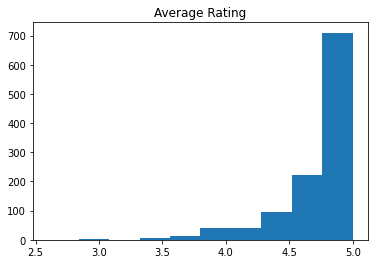

In [67]:
plt.hist(recipes['rating'])
plt.title('Average Rating')
plt.show()

#### Number of Ratings

In [63]:
recipes['num_ratings'].value_counts().sort_index()

1        42
2        96
3       103
4       100
5        74
       ... 
236       1
241       1
371       1
638       1
1037      1
Name: num_ratings, Length: 88, dtype: int64

In [64]:
recipes['num_ratings'].describe()

count    1131.000000
mean       16.405836
std        43.312578
min         1.000000
25%         4.000000
50%         8.000000
75%        16.000000
max      1037.000000
Name: num_ratings, dtype: float64

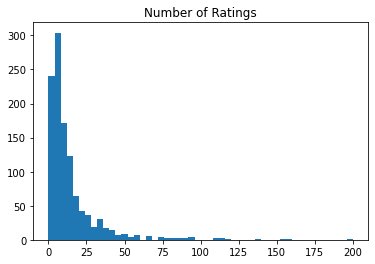

In [69]:
plt.hist(recipes['num_ratings'], bins=50,range=(0,200))
plt.title('Number of Ratings')
plt.show()

#### Author

In [35]:
recipes['author'].value_counts()

Anne Aobadia                     609
Jill Wallentin                   104
Naomi Sherman                     85
Kristie Sullivan, PhD             66
Pascale Naessens                  28
Cristina Curp                     28
Maria Emmerich                    27
Kate Nordin                       14
Sahil Makhija                     13
Kyndra Holley                     13
Carolyn Ketchum                   13
Katie Caldesi                     12
Kristina Wetter                   12
Martina Slajerova                 11
Megha Barot &amp; Matt Gaedke     10
Lisa MarcAurele                   10
Birgitta Höglund                  10
Clara Gonzalez                    10
Camilla Björklund                  9
Erika McKellar                     9
Franziska Spritzler, RD, CDE       6
Andrea Denolle                     6
Suzanne Ryan                       4
Emma Shevtzoff                     4
Seamus Mullen                      3
Anne Mullens, BSc, BJ              3
Team Diet Doctor                   2
K

In [38]:
# looks like we have a few suspicious authors: "Bell pepper, red", "Onion, yellow"
recipes[(recipes['author']=='Bell pepper, red') | (recipes['author']=='Onion, yellow')]

recipe_name  \
153     Low-Carb Seafood Chowder - Recipe - Diet Doctor   
1104  The Best Low-Carb Cauliflower Lasagna - Recipe...   
1108  Keto Creamy Chicken Alfredo Pasta - Recipe - D...   

                                            description  rating  num_ratings  \
153   Golden and creamy seafood soup with salmon and...    4.90           10   
1104  An amazing low-carb lasagna, from popular Swed...    4.93           14   
1108  Parmesan. Cream. Bacon. These three ingredient...    4.91           11   

                author  
153   Bell pepper, red  
1104     Onion, yellow  
1108  Bell pepper, red

In [70]:
# since these authors only account for 3 recipes let's drop these rows
recipes.drop([153,1104,1108],inplace=True)

In [75]:
recipes.iloc[152:154]

recipe_name                                                                                                                                                                                             description  rating  num_ratings         author
152                        Keto Chicken Zoodle Al Limone  A perfect summer dish that can be prepared in advance and then tossed together at the last minute. Delicious bites of chicken are coated in a delicate lemon sauce and then tossed through vibrant ...     5.0           13  Naomi Sherman
154  The Best Low-Carb Coconut Instant Pot Yogurt Recipe  Oh so delicious and creamy - try out this super simple home-made Instant Pot coconut yogurt recipe made with just 3 ingredients! It yields a perfectly thick and tangy dairy-free yogurt perfect fo...     5.0            2    Kate Nordin

In [76]:
# confirm rows were dropped
recipes['author'].value_counts()

Anne Aobadia                     609
Jill Wallentin                   104
Naomi Sherman                     85
Kristie Sullivan, PhD             66
Pascale Naessens                  28
Cristina Curp                     28
Maria Emmerich                    27
Kate Nordin                       14
Kyndra Holley                     13
Sahil Makhija                     13
Carolyn Ketchum                   13
Katie Caldesi                     12
Kristina Wetter                   12
Martina Slajerova                 11
Birgitta Höglund                  10
Megha Barot &amp; Matt Gaedke     10
Clara Gonzalez                    10
Lisa MarcAurele                   10
Camilla Björklund                  9
Erika McKellar                     9
Franziska Spritzler, RD, CDE       6
Andrea Denolle                     6
Suzanne Ryan                       4
Emma Shevtzoff                     4
Seamus Mullen                      3
Anne Mullens, BSc, BJ              3
Team Diet Doctor                   2
K

In [79]:
# clean author entry: Megha Barot &amp; Matt Gaedke
recipes['author'] = recipes['author'].str.replace('&amp;','&')
recipes['author'].value_counts()

Anne Aobadia                    609
Jill Wallentin                  104
Naomi Sherman                    85
Kristie Sullivan, PhD            66
Pascale Naessens                 28
Cristina Curp                    28
Maria Emmerich                   27
Kate Nordin                      14
Kyndra Holley                    13
Sahil Makhija                    13
Carolyn Ketchum                  13
Katie Caldesi                    12
Kristina Wetter                  12
Martina Slajerova                11
Birgitta Höglund                 10
Megha Barot & Matt Gaedke        10
Clara Gonzalez                   10
Lisa MarcAurele                  10
Erika McKellar                    9
Camilla Björklund                 9
Franziska Spritzler, RD, CDE      6
Andrea Denolle                    6
Suzanne Ryan                      4
Emma Shevtzoff                    4
Seamus Mullen                     3
Anne Mullens, BSc, BJ             3
Team Diet Doctor                  2
Kristin Berglund, RN        

## EDA: Recipes Data

In [81]:
author_group = recipes.groupby("author").mean()
author_group

rating  num_ratings
author                                             
Adele Hite, PhD, MPH, RDN     4.470000    15.000000
Andrea Denolle                4.933333     9.000000
Anne Aobadia                  4.737159    16.331691
Anne Mullens, BSc, BJ         4.633333    11.666667
Birgitta Höglund              4.797000     6.200000
Camilla Björklund             4.672222    13.000000
Carina Cueva                  3.750000     3.500000
Carolyn Ketchum               4.869231     9.307692
Clara Gonzalez                4.654000     9.500000
Cristina Curp                 4.802857     5.214286
Crystal Pullen                4.500000    12.000000
Emma Shevtzoff                4.670000     4.250000
Erika McKellar                4.844444    15.666667
Franziska Spritzler, RD, CDE  4.980000     5.500000
Henrik Thorsell               2.600000    10.000000
Jill Wallentin                4.820865    19.875000
Kate Nordin                   4.628571     4.500000
Katie Caldesi                 4.866667     4.833333
Kristie Sullivan, PhD         4.783030    28.803030
Kristin Berglund, RN          4.785000     5.500000
Kristina Wetter               4.765833     8.583333
Kyndra Holley                 4.887692    18.692308
Lisa MarcAurele               4.417000    15.500000
Maria Emmerich                4.538148    47.148148
Martina Slajerova             4.966364     3.545455
Megha Barot & Matt Gaedke     4.830000     9.100000
Naomi Sherman                 4.758118    14.752941
Pascale Naessens              4.695714     7.678571
Sahil Makhija                 4.708462     9.769231
Seamus Mullen                 4.856667     4.000000
Suzanne Ryan                  4.862500    20.750000
Team Diet Doctor              4.960000     7.000000

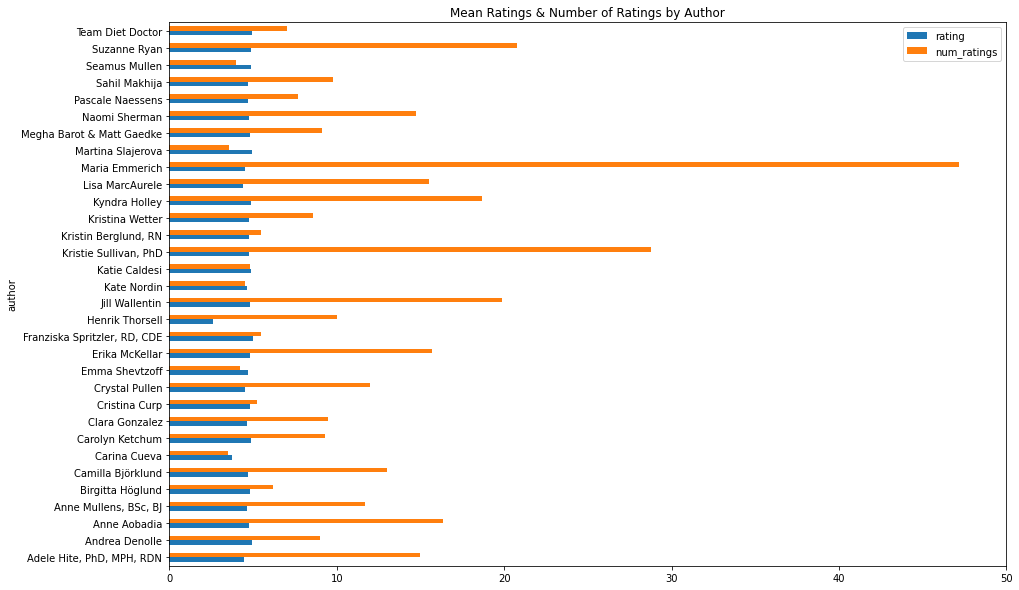

In [89]:
author_group.plot(kind='barh',title='Mean Ratings & Number of Ratings by Author',
                  xlim=(0,50), legend=True, figsize=(15,10))
plt.show()

Interestingly, it looks like Maria Emmerich's recipes generate far more ratings (with an avg number of ratings per recipe of 47) than other authors, even though Maria has authored an average number of recipes (27).

In [92]:
author_rating_group = recipes.groupby('author')['rating'].mean()
author_rating_group

author
Adele Hite, PhD, MPH, RDN       4.470000
Andrea Denolle                  4.933333
Anne Aobadia                    4.737159
Anne Mullens, BSc, BJ           4.633333
Birgitta Höglund                4.797000
Camilla Björklund               4.672222
Carina Cueva                    3.750000
Carolyn Ketchum                 4.869231
Clara Gonzalez                  4.654000
Cristina Curp                   4.802857
Crystal Pullen                  4.500000
Emma Shevtzoff                  4.670000
Erika McKellar                  4.844444
Franziska Spritzler, RD, CDE    4.980000
Henrik Thorsell                 2.600000
Jill Wallentin                  4.820865
Kate Nordin                     4.628571
Katie Caldesi                   4.866667
Kristie Sullivan, PhD           4.783030
Kristin Berglund, RN            4.785000
Kristina Wetter                 4.765833
Kyndra Holley                   4.887692
Lisa MarcAurele                 4.417000
Maria Emmerich                  4.538148
Martina S

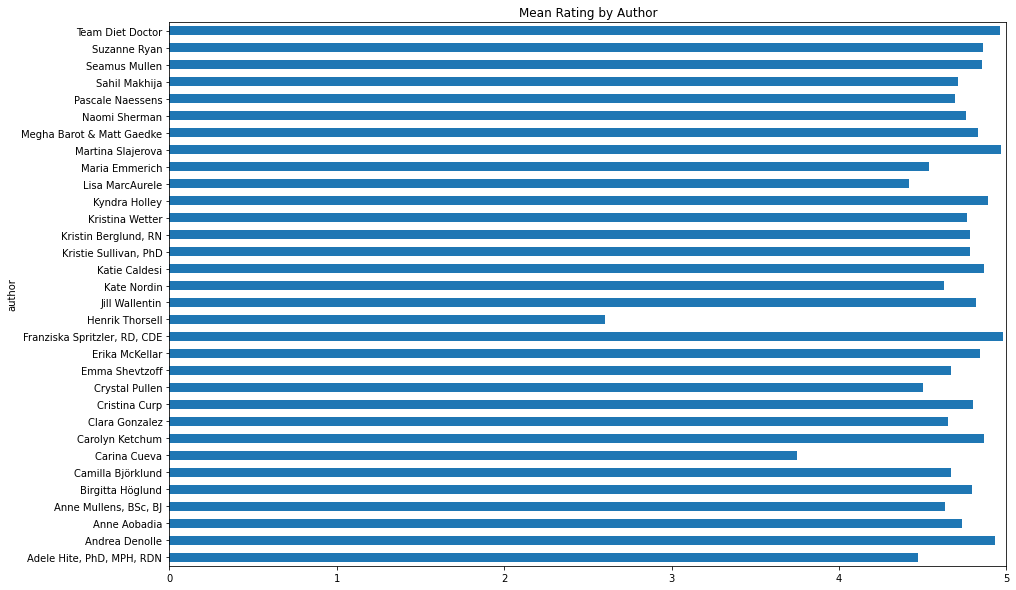

In [93]:
author_rating_group.plot(kind='barh',title='Mean Rating by Author',
                  xlim=(0,5), legend=False, figsize=(15,10))
plt.show()

There are only two authors who have an average rating less than 4: Henrik Thorsell (2.6) and Carina Cueva (3.75). However, these authors have only authored 3 recipes combined. 

## Data Cleaning: Ingredients Data

In [34]:
ingredients = pd.read_csv('ingredients.csv')

In [94]:
ingredients.head(15)

Unnamed: 0                                                        recipe_name                                                ingredients
0            0          Mushroom Rarebit with Poached Eggs - Recipe - Diet Doctor                                               3 large eggs
1            1          Mushroom Rarebit with Poached Eggs - Recipe - Diet Doctor                            1/3 cup shredded cheddar cheese
2            2          Mushroom Rarebit with Poached Eggs - Recipe - Diet Doctor                                      1/2 tsp Dijon mustard
3            3          Mushroom Rarebit with Poached Eggs - Recipe - Diet Doctor                               2 drops Worcestershire sauce
4            4          Mushroom Rarebit with Poached Eggs - Recipe - Diet Doctor                                        1 tbsp Greek yogurt
5            5          Mushroom Rarebit with Poached Eggs - Recipe - Diet Doctor  12 oz. portobello mushrooms about 1 large cap per serving
6            6          Mushroom Rarebit with Poached Eggs - Recipe - Diet Doctor                                              brushed clean
7            7          Mushroom Rarebit with Poached Eggs - Recipe - Diet Doctor                                        and stalks cut away
8            8          Mushroom Rarebit with Poached Eggs - Recipe - Diet Doctor                                            2 tsp olive oil
9            9          Mushroom Rarebit with Poached Eggs - Recipe - Diet Doctor                                            salt and pepper
10          10          Mushroom Rarebit with Poached Eggs - Recipe - Diet Doctor                                              for seasoning
11           0  High Protein Italian Turkey Salad - Low Carb Recipe - Diet Doctor                                     1/2 cup cottage cheese
12           1  High Protein Italian Turkey Salad - Low Carb Recipe - Diet Doctor                                         1 tbsp green pesto
13           2  High Protein Italian Turkey Salad - Low Carb Recipe - Diet Doctor            1 tbsp finely chopped sun-dried tomatoes in oil
14           3  High Protein Italian Turkey Salad - Low Carb Recipe - Diet Doctor                       salt or ground black pepper to taste

In [36]:
ingredients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18433 entries, 0 to 18432
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   18433 non-null  int64 
 1   recipe_name  18433 non-null  object
 2   ingredients  18433 non-null  object
dtypes: int64(1), object(2)
memory usage: 432.1+ KB


In [37]:
# drop the 'Unnamed: 0' column
ingredients.drop('Unnamed: 0',axis=1,inplace=True)
ingredients.head(2)

recipe_name  \
0  Mushroom Rarebit with Poached Eggs - Recipe - ...   
1  Mushroom Rarebit with Poached Eggs - Recipe - ...   

                       ingredients  
0                     3 large eggs  
1  1/3 cup shredded cheddar cheese

In [38]:
# perform same cleaning steps to recipe_name as we did for recipes dataframe
ingredients['recipe_name'] = ingredients['recipe_name'].str.replace('- Recipe - Diet Doctor','').str.replace('- Diet Doctor','').str.replace('- Recipe','').str.strip()

In [39]:
len(ingredients['recipe_name'].unique())

1131

Ingredients are generally in the format: <quantity> <unit of measurement> <ingredient name> e.g. 1 tbsp Greek yogurt.

Let's parse out each component, and isolate the ingredient names.

In [41]:
pattern_oz = r"(?P<amount>[0-9]/?[0-9]?)(?P<measure>[\s]?oz.?)\s(?P<name>.+)"
pattern_tsp = r"(?P<amount>[0-9]/?[0-9]?)(?P<measure>[\s]?tsp?)\s(?P<name>.+)"
pattern_tbsp = r"(?P<amount>[0-9]/?[0-9]?)(?P<measure>[\s]?tbsp?)\s(?P<name>.+)"
pattern_pinch = r"(?P<amount>[0-9]/?[0-9]?)(?P<measure>[\s]?pinch?)\s(?P<name>.+)"
pattern_cups = r"(?P<amount>[0-9]/?[0-9]?)(?P<measure>[\s]?cups?)\s(?P<name>.+)"
pattern_cup = r"(?P<amount>[0-9]/?[0-9]?)(?P<measure>[\s]?cup?)\s(?P<name>.+)"
pattern_lb = r"(?P<amount>[0-9]/?[0-9]?)(?P<measure>[\s]?lb?)\s(?P<name>.+)"
pattern_lbs = r"(?P<amount>[0-9]/?[0-9]?)(?P<measure>[\s]?lbs?)\s(?P<name>.+)"
pattern_drops = r"(?P<amount>[0-9]/?[0-9]?)(?P<measure>[\s]?drops?)\s(?P<name>.+)"

patterns = [pattern_oz, pattern_tsp, pattern_tbsp, pattern_pinch, pattern_cups, 
            pattern_cup, pattern_lb, pattern_lbs, pattern_drops]

ingredients_extracted = pd.DataFrame()
for pattern in patterns:
    extract_measure = ingredients['ingredients'].str.extractall(pattern,flags=re.I)
    ingredients_extracted = pd.concat([ingredients_extracted, extract_measure])
    
ingredients_extracted

amount measure                                               name
      match                                                                  
5     0         12     oz.  portobello mushrooms about 1 large cap per ser...
16    0        1/2     oz.                                           cucumber
18    0          4     oz.                     deli turkey or smoked deli ham
23    0          5     oz.                                           zucchini
25    0        1/2     oz.                                      celery stalks
...            ...     ...                                                ...
18386 0          2     lbs                            boneless chicken thighs
18422 0          1      lb                                           rutabaga
3     0          2   drops                               Worcestershire sauce
4055  0         10   drops                        liquid sweetener (optional)
4458  0         10   drops                          liquid sweetener (stevia)

[10436 rows x 3 columns]

In [42]:
ingredients_extracted.reset_index(inplace=True)

In [43]:
ingredients_extracted.head()

level_0  match amount measure  \
0        5      0     12     oz.   
1       16      0    1/2     oz.   
2       18      0      4     oz.   
3       23      0      5     oz.   
4       25      0    1/2     oz.   

                                                name  
0  portobello mushrooms about 1 large cap per ser...  
1                                           cucumber  
2                     deli turkey or smoked deli ham  
3                                           zucchini  
4                                      celery stalks

In [44]:
ingredients_extracted.drop(['level_0','match'], axis=1, inplace=True)

In [45]:
ingredients_extracted.head()

amount measure                                               name
0     12     oz.  portobello mushrooms about 1 large cap per ser...
1    1/2     oz.                                           cucumber
2      4     oz.                     deli turkey or smoked deli ham
3      5     oz.                                           zucchini
4    1/2     oz.                                      celery stalks

Looks like we didn't capture ingredients that don't contain a unit of measurement e.g. 3 large eggs. Let's grab those instances and add them to our extracted ingredients df.

In [66]:
# find instances where measure is missing
measures = ['oz.', 'tsp', 'tbsp', 'pinch', 'cups', 'cup', 'lb', 'lbs', 'drops']
ingredients_no_measure = []
for ingredient in ingredients['ingredients']:
    if not any(x in ingredient for x in measures):
        ingredients_no_measure.append(ingredient)
        
ingredients_no_measure[:20]

['3 large eggs',
 ' brushed clean',
 ' and stalks cut away',
 'salt and pepper',
 ' for seasoning',
 'salt or ground black pepper to taste',
 ' diced',
 ' diced',
 ' diced',
 'salt and ground black pepper',
 ' shredded',
 'salt to taste',
 ' drained',
 ' finely chopped ',
 '1/4 lime',
 ' the juice',
 'salt to taste',
 '4 small lettuce leafs',
 '1 red chili pepper',
 '1 garlic clove']

In [67]:
# list contains some non-ingredients that were the result of the split on comma, which appear to have a leading space
# let's remove any ingredients with a leading space
ingredients_no_measure_clean = []
for ingredient in ingredients_no_measure:
    if not ingredient.startswith(' '):
        ingredients_no_measure_clean.append(ingredient)
        
ingredients_no_measure_clean[:20]

['3 large eggs',
 'salt and pepper',
 'salt or ground black pepper to taste',
 'salt and ground black pepper',
 'salt to taste',
 '1/4 lime',
 'salt to taste',
 '4 small lettuce leafs',
 '1 red chili pepper',
 '1 garlic clove',
 'pepper',
 '1 white onion',
 'salt and pepper',
 '2 large eggs',
 '1 green chili pepper',
 'salt and pepper',
 '1 yellow onion',
 '5 large eggs',
 '2 garlic cloves',
 'salt and pepper']

In [48]:
# convert list to pandas Series so that we can extract the ingredient name and combine it with our extracted_ingredients
ingredients_no_measure_clean = pd.Series(ingredients_no_measure_clean)
ingredients_no_measure_clean

0                               3 large eggs
1                            salt and pepper
2       salt or ground black pepper to taste
3               salt and ground black pepper
4                              salt to taste
                        ...                 
7109                         iceberg lettuce
7110                                1 tomato
7111                               1 avocado
7112                             poppy seeds
7113                                sea salt
Length: 7114, dtype: object

In [49]:
ingredients_no_measure_clean = ingredients_no_measure_clean.str.extract(r"(?P<amount>[0-9]/?[0-9]?)?[\s]?(?P<name>.+)",flags=re.I)
ingredients_no_measure_clean

amount                                  name
0         3                            large eggs
1       NaN                       salt and pepper
2       NaN  salt or ground black pepper to taste
3       NaN          salt and ground black pepper
4       NaN                         salt to taste
...     ...                                   ...
7109    NaN                       iceberg lettuce
7110      1                                tomato
7111      1                               avocado
7112    NaN                           poppy seeds
7113    NaN                              sea salt

[7114 rows x 2 columns]

In [51]:
ingredients_extracted_final = pd.concat([ingredients_extracted, ingredients_no_measure_clean])
ingredients_extracted_final

amount measure                                               name
0        12     oz.  portobello mushrooms about 1 large cap per ser...
1       1/2     oz.                                           cucumber
2         4     oz.                     deli turkey or smoked deli ham
3         5     oz.                                           zucchini
4       1/2     oz.                                      celery stalks
...     ...     ...                                                ...
7109    NaN     NaN                                    iceberg lettuce
7110      1     NaN                                             tomato
7111      1     NaN                                            avocado
7112    NaN     NaN                                        poppy seeds
7113    NaN     NaN                                           sea salt

[17550 rows x 3 columns]

In [52]:
ingredients_extracted_final['measure'].value_counts()

 cup      2908
 tbsp     2136
 tsp      1891
 oz.      1886
 lb        616
 lbs       467
 cups      395
 pinch     134
 drops       3
Name: measure, dtype: int64

## EDA: Ingredients Data

Top 20 Ingredients

In [63]:
ingredient_freq = ingredients_extracted_final['name'].value_counts()
ingredient_freq[:40]

salt                           616
olive oil                      439
butter                         417
heavy whipping cream           359
mayonnaise                     313
ground black pepper            298
pepper                         217
water                          201
garlic cloves                  193
almond flour                   184
eggs                           173
salt and pepper                162
cream cheese                   160
shredded Parmesan cheese       153
sour cream                     138
cauliflower                    117
fresh parsley                  116
coconut flour                  114
vanilla extract                113
cheddar cheese                 108
fresh cilantro                 108
yellow onion                   107
lemon juice                    103
garlic clove                    99
sea salt                        97
large eggs                      96
ground psyllium husk powder     94
garlic powder                   93
baking powder       

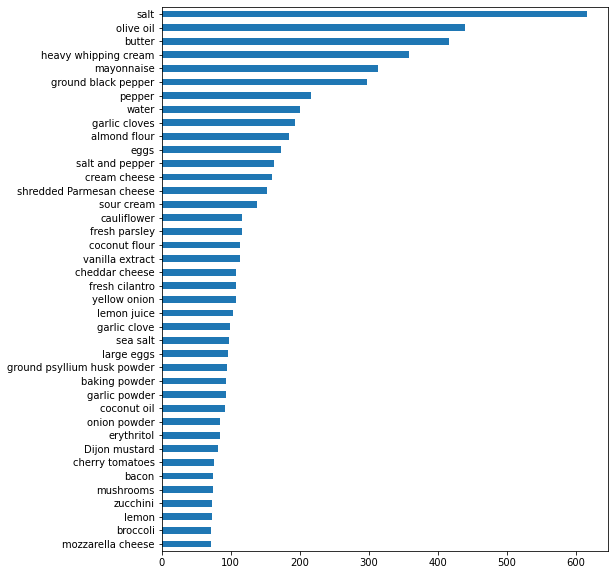

In [62]:
ingredient_freq[:40].sort_values().plot(kind='barh', figsize=(8,10));

## Summary of Observations

 * One author's, Maria Emmerich, recipes appear to generate far more ratings than those of other authors.
 * Only two authors have an average rating less than 4; and these authors are only responsible for 3 recipes.
 * Most popular ingredients by category:
    * Cooking oil/fat: olive oil and butter
    * Herbs & seasonings: salt, pepper, parsley
    * Flours: almond flour, coconut flour, ground psyllium husk powder
    * Vegetables: cauliflower, yellow onion, garlic, cherry tomatoes, mushrooms, succhini, broccoli
    * Cheese: shredded parmesan, cheddar, mozzarella
    * Meat & animal products: eggs, bacon
    * Condiments/miscellaneous: heavy whipping cream, mayonnaise, cream cheese, sour cream